# Philadelphia Race Profile - 1940

## Description:
 
The selected 1940 racial demographic dataset was sourced from Social Explorer; U.S. Census Bureau. The census survey data is used to explored Philadelphia's race profile, as well as the North Philadelphia's Logan Neighborhood Race Profile. 

Per the [Data Dictionary](https://www.socialexplorer.com/data/C1940TractDS/metadata?ds=SE&table=T009), three race classifications are distinguished in this bulletin: white, Black, and other races. Furthermore, "Persons of Mexican birth or ancestry who were not definitely Indian or of other nonwhite race were returned as white in 1940."

For this project, we are comparing the Philadelphia Race Profile in 1940 to 2021. We are also zooming into the Logan Neighborhood of Philadelphia to determine how redlining impacted the racial demographics of the neighborhood specifically. 

Due to Philadelphia Census tracts being different in 1940, I used the Map function on Social Explorer to determine which census tracts encompassed the Logan Neighborhood. 

Then, Philadelphia's 2010 census tracts are imported via a geojson file soured from Open Data Philly. The race data is then overlayed on the spatial file to view at the city and neighborhood level.

### Author: Lindsey Morris

I begin by importing libraries

In [218]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

Load a data file from Week 8 of my repo with FIPS 

In [219]:
#load a data file
df = pd.read_csv('1940race.csv',dtype={'Geo_FIPS':'string'})

#### Inspect the data

Begin with size of data

In [220]:
df.shape

(404, 13)

In [221]:
df.head()

,Geo_Name,Geo_QName,Geo_SUMLEV,Geo_FIPS,Geo_state,Geo_county,SE_T009_001,SE_T009_002,SE_T009_003,SE_T009_004,PCT_SE_T009_002,PCT_SE_T009_003,PCT_SE_T009_004
0,1A,"Census Tract 1A, Philadelphia County, Pennsylv...",140,4210100101000,42,101,582,581,1,0,99.83,0.17,0.00
1,1B,"Census Tract 1B, Philadelphia County, Pennsylv...",140,4210100102000,42,101,16378,16172,199,7,98.74,1.22,0.04
2,1C,"Census Tract 1C, Philadelphia County, Pennsylv...",140,4210100103000,42,101,19667,19415,251,1,98.72,1.28,0.01
3,2A,"Census Tract 2A, Philadelphia County, Pennsylv...",140,4210100201000,42,101,9818,8147,1669,2,82.98,17.00,0.02
4,2B,"Census Tract 2B, Philadelphia County, Pennsylv...",140,4210100202000,42,101,10876,10170,703,3,93.51,6.46,0.03


In [222]:
#look at the data types
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Geo_Name         404 non-null    object 
 1   Geo_QName        404 non-null    object 
 2   Geo_SUMLEV       404 non-null    int64  
 3   Geo_FIPS         404 non-null    string 
 4   Geo_state        404 non-null    int64  
 5   Geo_county       404 non-null    int64  
 6   SE_T009_001      404 non-null    int64  
 7   SE_T009_002      404 non-null    int64  
 8   SE_T009_003      404 non-null    int64  
 9   SE_T009_004      404 non-null    int64  
 10  PCT_SE_T009_002  398 non-null    float64
 11  PCT_SE_T009_003  398 non-null    float64
 12  PCT_SE_T009_004  398 non-null    float64
dtypes: float64(3), int64(7), object(2), string(1)
memory usage: 41.2+ KB


#### Define columns to keep

We only want to keep the following columns:

- Geo_Name: Census Tract
- Geo_FIPS:Federal Information Processing System Code
- SE_T009_001:Total Population
- SE_T009_002:White
- SE_T009_003:Black
- SE_T009_004:Other Race
- PCT_SE_T009_002: Percent White
- PCT_SE_T009_003: Percent Black
- PCT_SE_T009_004: Percent Other Race


Create a subset of our dataframe and turn it into a new dataframe called df2:

In [223]:
#define columns to keep
columns_to_keep = ['Geo_Name',
                   'Geo_FIPS',
                   'SE_T009_001',
                   'SE_T009_002',
                   'SE_T009_003',
                   'SE_T009_004',
                   'PCT_SE_T009_002',
                   'PCT_SE_T009_003',
                   'PCT_SE_T009_004'] 
#add it to a new dataframe
df2 = df[columns_to_keep]

#### Rename kept columns

In [224]:
#create a list of column names as they are now
columns = list(df2) # this is the same as df.columns.to_list()
columns

['Geo_Name',
 'Geo_FIPS',
 'SE_T009_001',
 'SE_T009_002',
 'SE_T009_003',
 'SE_T009_004',
 'PCT_SE_T009_002',
 'PCT_SE_T009_003',
 'PCT_SE_T009_004']

In [225]:
#Replace the values with your desired column names
df2.columns = ['Census Tract',
               'FIPS',
               'TotalPop',
               'White',
               'Black',
               'Other Race',
               'Percent White',
               'Percent Black',
               'Percent Other Race']

In [226]:
#View Sample of Data to confirm the columns changed
df2.sample(5)

,Census Tract,FIPS,TotalPop,White,Black,Other Race,Percent White,Percent Black,Percent Other Race
180,34J,4210103410000,2892,2790,102,0,96.47,3.53,0.00
147,29C,4210102903000,10724,10589,128,7,98.74,1.19,0.07
290,40M,4210104013000,9,3,6,0,33.33,66.67,0.00
116,23J,4210102310000,936,925,11,0,98.82,1.18,0.00
355,42BB,4210104228000,3825,3818,7,0,99.82,0.18,0.00


#### Drop Null Data

In [227]:
df2 = df2.dropna()

In [228]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 403
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Census Tract        398 non-null    object 
 1   FIPS                398 non-null    string 
 2   TotalPop            398 non-null    int64  
 3   White               398 non-null    int64  
 4   Black               398 non-null    int64  
 5   Other Race          398 non-null    int64  
 6   Percent White       398 non-null    float64
 7   Percent Black       398 non-null    float64
 8   Percent Other Race  398 non-null    float64
dtypes: float64(3), int64(4), object(1), string(1)
memory usage: 31.1+ KB


#### Create a subset of data for the logan Neighborhood

In [229]:
# Specify the desired census tracts by their IDs
subset = ['42X', '42II', '42Y', '42W', '42HH', '42KK', '42JJ']

# Create a subset of the data for the desired census tracts
subset = df2[df2["Census Tract"].isin(subset)]

# Save the subset to a new CSV file
subset.to_csv("census_subset.csv", index=False)


In [230]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 350 to 364
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Census Tract        7 non-null      object 
 1   FIPS                7 non-null      string 
 2   TotalPop            7 non-null      int64  
 3   White               7 non-null      int64  
 4   Black               7 non-null      int64  
 5   Other Race          7 non-null      int64  
 6   Percent White       7 non-null      float64
 7   Percent Black       7 non-null      float64
 8   Percent Other Race  7 non-null      float64
dtypes: float64(3), int64(4), object(1), string(1)
memory usage: 560.0+ bytes


In [231]:
subset.head(7)

,Census Tract,FIPS,TotalPop,White,Black,Other Race,Percent White,Percent Black,Percent Other Race
350,42W,4210104223000,3406,3351,55,0,98.39,1.61,0.00
351,42X,4210104224000,132,130,2,0,98.48,1.52,0.00
352,42Y,4210104225000,4463,4459,4,0,99.91,0.09,0.00
361,42HH,4210104234000,10064,10015,31,18,99.51,0.31,0.18
362,42II,4210104235000,4943,4932,7,4,99.78,0.14,0.08
363,42JJ,4210104236000,1588,1588,0,0,100.00,0.00,0.00
364,42KK,4210104237000,4385,4381,4,0,99.91,0.09,0.00


This subset of data contains columns we don't need. Let's remove those below

In [232]:
subset_column_keep = ['Census Tract',
'FIPS',
'TotalPop',
'White',
'Black',
'Other Race']

subset2 = subset[subset_column_keep]

In [233]:
subset2.sample(5)

,Census Tract,FIPS,TotalPop,White,Black,Other Race
350,42W,4210104223000,3406,3351,55,0
362,42II,4210104235000,4943,4932,7,4
352,42Y,4210104225000,4463,4459,4,0
363,42JJ,4210104236000,1588,1588,0,0
361,42HH,4210104234000,10064,10015,31,18


Now Let's remove any null values

In [234]:
subset2 = subset2.dropna()
subset2

,Census Tract,FIPS,TotalPop,White,Black,Other Race
350,42W,4210104223000,3406,3351,55,0
351,42X,4210104224000,132,130,2,0
352,42Y,4210104225000,4463,4459,4,0
361,42HH,4210104234000,10064,10015,31,18
362,42II,4210104235000,4943,4932,7,4
363,42JJ,4210104236000,1588,1588,0,0
364,42KK,4210104237000,4385,4381,4,0


Now, create a streamlined dataset. Before generating charts, sort the census tracts in ascending order so that it will make more sense visually

In [235]:
subset3 = subset2.sort_values(by='Census Tract',ascending=True)
subset3.head(10)

,Census Tract,FIPS,TotalPop,White,Black,Other Race
361,42HH,4210104234000,10064,10015,31,18
362,42II,4210104235000,4943,4932,7,4
363,42JJ,4210104236000,1588,1588,0,0
364,42KK,4210104237000,4385,4381,4,0
350,42W,4210104223000,3406,3351,55,0
351,42X,4210104224000,132,130,2,0
352,42Y,4210104225000,4463,4459,4,0


In [236]:
subset3.columns

Index(['Census Tract', 'FIPS', 'TotalPop', 'White', 'Black', 'Other Race'], dtype='object')

Make bar charts using our trimmed and sorted variable for race. First, generate a chart per the following race and ethnicity categories: White, Black, and Other Race.

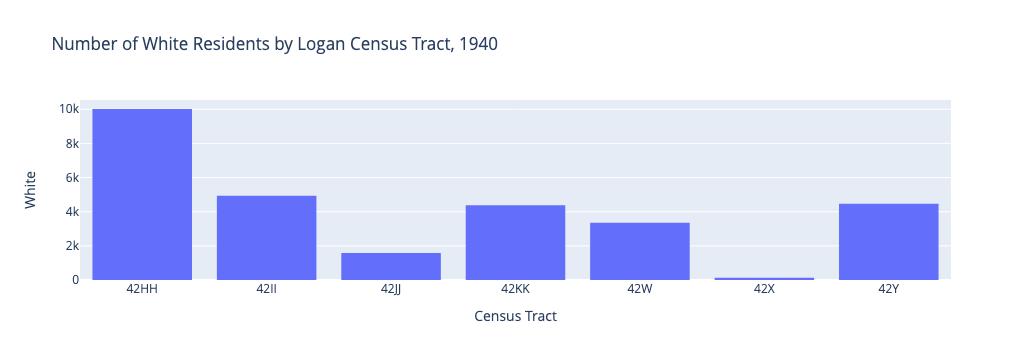

In [237]:
fig = px.bar(subset3,
             x='Census Tract',
             y='White',
             title='Number of White Residents by Logan Census Tract, 1940',
             labels={
                 'Census Tract':'Census Tract'
             }
            )
fig.update_traces(marker_line_width=0)
fig.show()

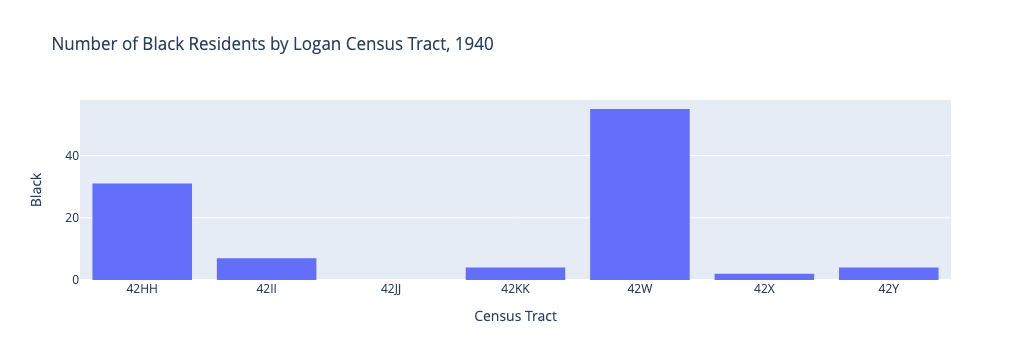

In [238]:
fig = px.bar(subset3,
             x='Census Tract',
             y='Black',
             title='Number of Black Residents by Logan Census Tract, 1940',
             labels={
                 'Census Tract':'Census Tract'
             }
            )
fig.update_traces(marker_line_width=0)
fig.show()

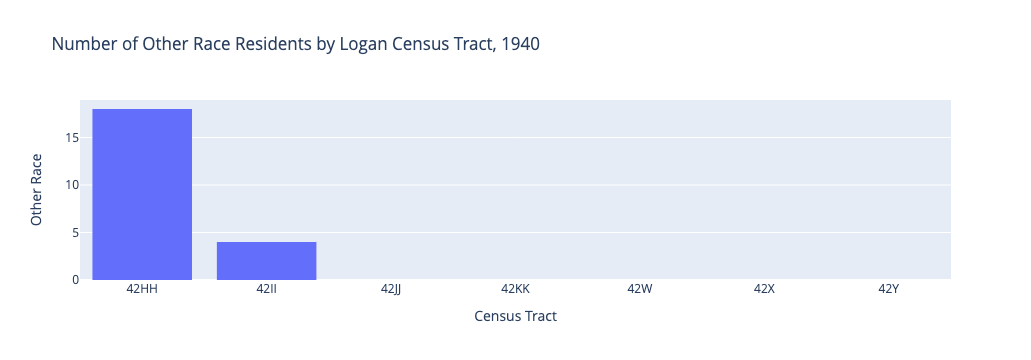

In [239]:
fig = px.bar(subset3,
             x='Census Tract',
             y='Other Race',
             title='Number of Other Race Residents by Logan Census Tract, 1940',
             labels={
                 'Census Tract':'Census Tract'
             }
            )
fig.update_traces(marker_line_width=0)
fig.show()

Now, individual charts by each race category, broken down by census tract, have been created. To draw better comparisons of demographic distribution across and within census tracts, let's create a stacked chart.

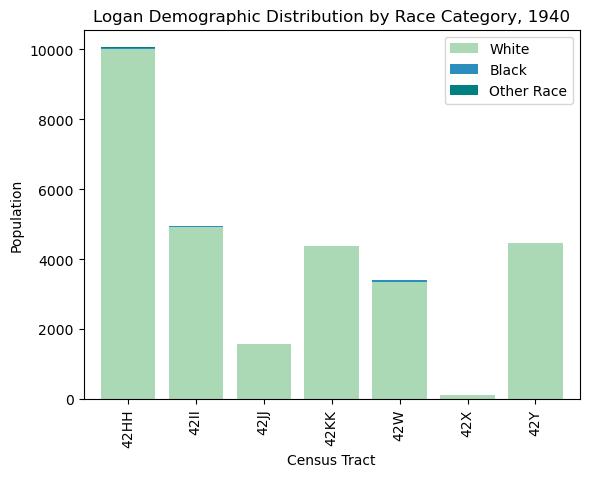

In [240]:
# set the census tract column as the index
subset3.set_index('Census Tract', inplace=True)

# remove the 'total population' column
subset3.drop('TotalPop', axis=1, inplace=True)

# define a list of custom colors
colors = ['#ABD9B5', '#2C8EBF', '#008080']

# plot the stacked bar chart with custom colors
ax = subset3.plot(kind='bar', width=.8, stacked=True, color=colors)

# set the axis labels and title
ax.set_xlabel('Census Tract')
ax.set_ylabel('Population')
ax.set_title('Logan Demographic Distribution by Race Category, 1940')

# save the bar chart as a PNG file
plt. savefig('Logan 1940.png', dpi=400, transparent=True)

# show the chart
plt.show()

I want to show the racial percentange vs individual count on the map, so i'm going to create another subset of data now.

In [241]:
percent_columns =['Census Tract',
                  'FIPS',
               'Percent White',
               'Percent Black',
               'Percent Other Race']

percent_subset = subset[percent_columns]

In [242]:
percent_subset.columns = ['Census Tract',
                          'FIPS',
                          'Percent White',
                          'Percent Black',
                          'Percent Other Race']

percent_subset.sample(5)

,Census Tract,FIPS,Percent White,Percent Black,Percent Other Race
364,42KK,4210104237000,99.91,0.09,0.00
352,42Y,4210104225000,99.91,0.09,0.00
362,42II,4210104235000,99.78,0.14,0.08
351,42X,4210104224000,98.48,1.52,0.00
363,42JJ,4210104236000,100.00,0.00,0.00


#### Importing Census Tract Shapefile

<AxesSubplot: >

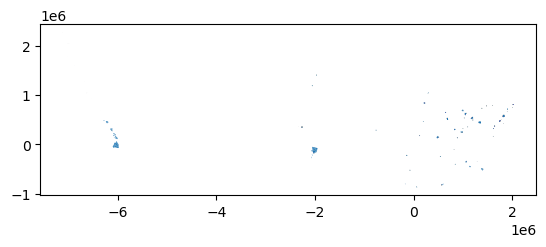

In [243]:
import geopandas as gpd
import zipfile

# Define the path to the zipped shapefile folder
zip_path = '/home/jovyan/up221-lindsey/Final_Project_Files/1940tracts2.zip'

# Extract the shapefile files to a temporary directory
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('temp_dir')

# Load the shapefile into a GeoDataFrame
shapefile_path = 'temp_dir/US_tract_1940.shp'
#Read only the FIPS and geometry columns from the shapefile, and specify the CRS as EPSG:4326, which is the standard WGS84 coordinate system.
gdf = gpd.read_file(shapefile_path, crs='EPSG:4326', usecols=['FIPS', 'geometry'])

# Plot the shapefile on a map
gdf.plot()


Before I can merge the Shapefile with the CSV data, I need to find a column at the census tract level that I can merge the data together with

In [244]:
#view the GDF columns
print(gdf.columns)

Index(['NHGISST', 'NHGISCTY', 'GISJOIN', 'GISJOIN2', 'SHAPE_AREA', 'SHAPE_LEN',
       'geometry'],
      dtype='object')


In [245]:
#view the DF columns
print(df.columns)

Index(['Geo_Name', 'Geo_QName', 'Geo_SUMLEV', 'Geo_FIPS', 'Geo_state',
       'Geo_county', 'SE_T009_001', 'SE_T009_002', 'SE_T009_003',
       'SE_T009_004', 'PCT_SE_T009_002', 'PCT_SE_T009_003', 'PCT_SE_T009_004'],
      dtype='object')


In [246]:
#look at the data within the GDF file
gdf.head()

,NHGISST,NHGISCTY,GISJOIN,GISJOIN2,SHAPE_AREA,SHAPE_LEN,geometry
0,550,0790,G55007900090,55007900090,1.902826e+06,9640.965368,"POLYGON ((650791.784 654746.221, 650886.198 65..."
1,550,0790,G55007900094,55007900094,4.469542e+06,12723.051874,"POLYGON ((646759.565 651779.856, 646851.837 65..."
2,550,0790,G55007900106,55007900106,1.922867e+06,9018.734789,"POLYGON ((645601.102 647368.017, 645603.998 64..."
3,550,0790,G55007900120,55007900120,5.911788e+05,3910.293426,"POLYGON ((651610.978 645287.406, 651627.984 64..."
4,550,0790,G55007900121,55007900121,5.986344e+05,3298.722875,"POLYGON ((651663.884 644664.080, 651672.815 64..."


In [247]:
#look at the data within the DF file
df.head()

,Geo_Name,Geo_QName,Geo_SUMLEV,Geo_FIPS,Geo_state,Geo_county,SE_T009_001,SE_T009_002,SE_T009_003,SE_T009_004,PCT_SE_T009_002,PCT_SE_T009_003,PCT_SE_T009_004
0,1A,"Census Tract 1A, Philadelphia County, Pennsylv...",140,4210100101000,42,101,582,581,1,0,99.83,0.17,0.00
1,1B,"Census Tract 1B, Philadelphia County, Pennsylv...",140,4210100102000,42,101,16378,16172,199,7,98.74,1.22,0.04
2,1C,"Census Tract 1C, Philadelphia County, Pennsylv...",140,4210100103000,42,101,19667,19415,251,1,98.72,1.28,0.01
3,2A,"Census Tract 2A, Philadelphia County, Pennsylv...",140,4210100201000,42,101,9818,8147,1669,2,82.98,17.00,0.02
4,2B,"Census Tract 2B, Philadelphia County, Pennsylv...",140,4210100202000,42,101,10876,10170,703,3,93.51,6.46,0.03


Unfortunately, this shapefile doesn't contain a FIPS column or any other common identifier with the CSV file, which means that it isn't possible to merge it with the dataframe. I have tried to identify and download other file formats, such as a geojson, but that search has been unsuccessful. Sadly, it doesn't appear that mapping the data will be possible. 